# Customer Churn Analysis 

Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 
 

In [1]:
#Importing the necessary libraires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the dataset
df = pd.read_csv("Telecom_customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


The dataset has 7043 rows and 21 columns

## Understanding the Dataset and EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


As we can see in the above table, it is clear to point out that many columns here have object datatype, while a few columns have integer and float datatype. 

However, it is important to note that somw of the columns here such as customerID are redundant columns. Also, the TotalCharges column is in object datatype. Hence, let us proceed in changing the datatype of TotalCharges and dropping the customerID column

In [4]:
df.drop("customerID", axis = 1, inplace = True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


The dataset now reduces to 7043 rows and 20 columns

In [5]:
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')
df[df['TotalCharges'].isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [7]:
df.dropna(inplace = True)
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [8]:
#Checking for null values in the dataset
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values in the dataset

## Visualizing the Dataset 

No     5163
Yes    1869
Name: Churn, dtype: int64

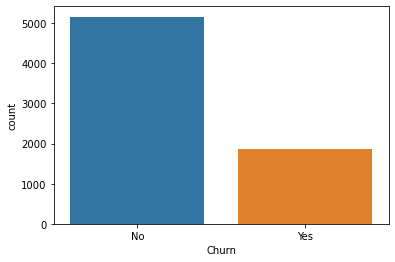

In [9]:
# Customer Churn Count
sb.countplot(x=df['Churn'])
df["Churn"].value_counts()

As observed in the above depiction, it is clear to note that 26.53% of customers had chosen to leave the Telecom company, while 73.47% chose to stick to this particular telecom company.

###  gender vs Churn

<AxesSubplot:xlabel='Churn', ylabel='count'>

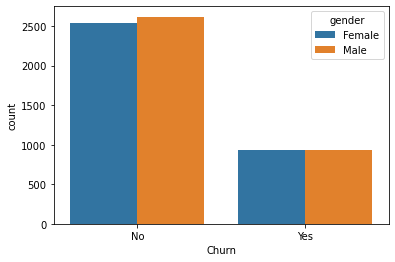

In [10]:
sb.countplot(x=df['Churn'], hue = df["gender"], data = df)

### SeniorCitizen vs Churn 

<AxesSubplot:xlabel='Churn', ylabel='count'>

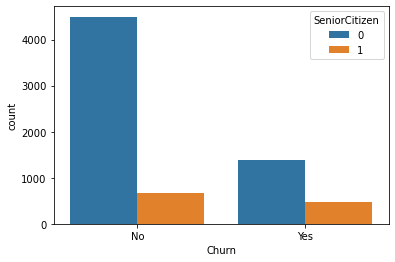

In [11]:
sb.countplot(x=df['Churn'], hue = df["SeniorCitizen"], data = df)

### Partner vs Churn 

<AxesSubplot:xlabel='Churn', ylabel='count'>

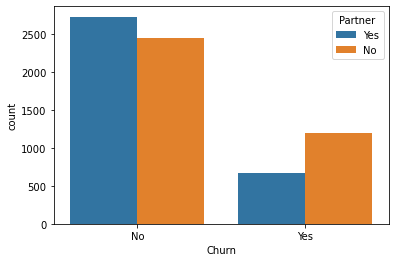

In [12]:
sb.countplot(x=df['Churn'], hue = df["Partner"], data = df)

### Dependents vs Churn

<AxesSubplot:xlabel='Churn', ylabel='count'>

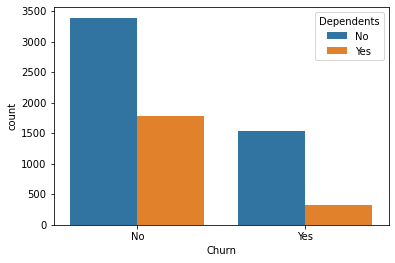

In [13]:
sb.countplot(x=df['Churn'], hue = df["Dependents"], data = df)

In [14]:
#Label encoding object datatypes with Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list(df.columns):
    if df[i].dtype=='object':
        df[i]=le.fit_transform(df[i])

In [15]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


## Building a Predictive Model 

Since we are predicting Customer Churn, the underlying model we need to build is one of a classification model.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

In [17]:
X = df.drop("Churn", axis = 1)
Y = df["Churn"]

In [18]:
print(X)

      gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0          0              0        1           0       1             0   
1          1              0        0           0      34             1   
2          1              0        0           0       2             1   
3          1              0        0           0      45             0   
4          0              0        0           0       2             1   
...      ...            ...      ...         ...     ...           ...   
7038       1              0        1           1      24             1   
7039       0              0        1           1      72             1   
7040       0              0        1           1      11             0   
7041       1              1        1           0       4             1   
7042       1              0        0           0      66             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0                 1                0     

In [19]:
print(Y)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32


In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=3)

## K-Neighbours Classifier 

In [21]:
knc = KNeighborsClassifier()
knc.fit(X_train,Y_train)
predknc=knc.predict(X_test)

In [22]:
knc.score(X_train,Y_train)

0.8279154815115807

In [23]:
print(accuracy_score(Y_test,predknc))

0.7606635071090048


In [24]:
print(confusion_matrix(Y_test,predknc))

[[1366  214]
 [ 291  239]]


In [25]:
print(classification_report(Y_test,predknc))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1580
           1       0.53      0.45      0.49       530

    accuracy                           0.76      2110
   macro avg       0.68      0.66      0.67      2110
weighted avg       0.75      0.76      0.75      2110



In [27]:
scoreknc=cross_val_score(knc,X,Y,cv=5)
print(scoreknc)
print(scoreknc.mean())
print(scoreknc.std())

[0.75124378 0.77327647 0.75889047 0.75462304 0.76742532]
0.7610918178867905
0.00815173492173779


## Support Vector Classifier 

In [30]:
svc = SVC()
svc.fit(X_train,Y_train)
predsvc=svc.predict(X_test)

In [31]:
svc.score(X_train,Y_train)

0.7279561154002439

In [32]:
print(accuracy_score(Y_test,predsvc))

0.7488151658767772


In [33]:
print(confusion_matrix(Y_test,predsvc))

[[1580    0]
 [ 530    0]]


In [34]:
print(classification_report(Y_test,predsvc))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1580
           1       0.00      0.00      0.00       530

    accuracy                           0.75      2110
   macro avg       0.37      0.50      0.43      2110
weighted avg       0.56      0.75      0.64      2110



In [35]:
scoresvc=cross_val_score(svc,X,Y,cv=5)
print(scoresvc)
print(scoresvc.mean())
print(scoresvc.std())

[0.73418621 0.73418621 0.73470839 0.73399716 0.73399716]
0.7342150252598014
0.0002607706361655165


## Decision Tree Classifier

In [36]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
preddtc=dtc.predict(X_test)

In [37]:
dtc.score(X_train,Y_train)

0.997765136123527

In [38]:
print(accuracy_score(Y_test,preddtc))

0.7246445497630332


In [39]:
print(confusion_matrix(Y_test,preddtc))

[[1258  322]
 [ 259  271]]


In [40]:
print(classification_report(Y_test,preddtc))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1580
           1       0.46      0.51      0.48       530

    accuracy                           0.72      2110
   macro avg       0.64      0.65      0.65      2110
weighted avg       0.74      0.72      0.73      2110



In [41]:
scoredtc=cross_val_score(dtc,X,Y,cv=5)
print(scoredtc)
print(scoredtc.mean())
print(scoredtc.std())

[0.73773987 0.72992182 0.71763869 0.70483642 0.74395448]
0.7268182558049016
0.014071458556395513


## Random Forest Classifier 

In [42]:
rfc = RandomForestClassifier()
rfc.fit(X_train,Y_train)
predrfc=rfc.predict(X_test)

In [43]:
rfc.score(X_train,Y_train)

0.997765136123527

In [44]:
print(accuracy_score(Y_test,predrfc))

0.7938388625592417


In [45]:
print(confusion_matrix(Y_test,predrfc))

[[1410  170]
 [ 265  265]]


In [46]:
print(classification_report(Y_test,predrfc))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1580
           1       0.61      0.50      0.55       530

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.79      2110



In [47]:
scorerfc=cross_val_score(rfc,X,Y,cv=5)
print(scorerfc)
print(scorerfc.mean())
print(scorerfc.std())

[0.79673063 0.79175551 0.76600284 0.79445235 0.79943101]
0.7896744685432824
0.012103587597885882


Comparing the above scores, before and after cross validation, we can see that Support Vector Classifier is the best model to predict the customer churn. 

This is because the difference between the scores before and after cross validation is the least compared to other models.

## Grid Search CV

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
grid_params = {
    'C' : [1.0,2.0,3.0,4.0,5.0],
    'kernel': ["linear", "poly", "rbf"],
    'degree' : [10,20,25]
}

In [ ]:
GCV = GridSearchCV(SVC(), grid_params, cv = 5)
GCV.fit(X_train,Y_train)

In [ ]:
mod = SVC(C = 2.0, kernel = "rbf", degree = 20)
mod.fit(X_train,Y_train)
pred = mod.predict(X_test)